In [2]:
import os
import pandas as pd

# Specify the folder containing your Excel files
data_folder = "Data"

# Define the column names
col_names = ['Case ID', 'Suspect Product Active Ingredients', 'Reason for Use', 'Reactions', 'Serious', 'Outcomes', 'Sex', 'Patient Age', 'Patient Weight']

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame(columns=col_names)

# Iterate over all Excel files in the folder
for file in os.listdir(data_folder):
    if file.endswith(".xlsx"):  # Check if the file is an Excel file
        file_path = os.path.join(data_folder, file)
        # Read the Excel file and add it to the combined DataFrame
        data = pd.read_excel(file_path, usecols=col_names)  # Load only the specified columns
        combined_data = pd.concat([combined_data, data], ignore_index=True)

# Display the combined dataset
print(combined_data)

        Case ID                 Suspect Product Active Ingredients  \
0      24791405                         Semaglutide;Insulin Aspart   
1      24791400                                     Insulin Aspart   
2      24787265  Dextrose Monohydrate\Sodium Chloride;Fluticaso...   
3      24786424        Insulin Degludec\Liraglutide;Insulin Aspart   
4      24786413                       Insulin Human;Insulin Aspart   
...         ...                                                ...   
93407   4318425                                      Insulin Human   
93408   4318416                                      Insulin Human   
93409   4302944                                      Insulin Human   
93410   4302346                                      Insulin Human   
93411   4250549                                       Insulin Beef   

                                          Reason for Use  \
0                                      Diabetes Mellitus   
1                                      

In [3]:
combined_data.head()

,Case ID,Suspect Product Active Ingredients,Reason for Use,Reactions,Serious,Outcomes,Sex,Patient Age,Patient Weight
0,24791405,Semaglutide;Insulin Aspart,Diabetes Mellitus,Constipation;Abdominal Pain Upper;Syncope;Asth...,Serious,Other Outcomes,Male,72 YR,Not Specified
1,24791400,Insulin Aspart,Diabetes Mellitus,Oedema Peripheral;Face Oedema,Serious,Hospitalized,Female,76 YR,Not Specified
2,24787265,Dextrose Monohydrate\Sodium Chloride;Fluticaso...,Anaemia;Analgesic Therapy;Antacid Therapy;Anti...,Multiple Organ Dysfunction Syndrome;Abdominal ...,Serious,Life Threatening;Disabled;Other Outcomes;Died;...,Male,80 YR,69 KG
3,24786424,Insulin Degludec\Liraglutide;Insulin Aspart,Product Used For Unknown Indication,Product Storage Error;Hyperglycaemia;Malaise;D...,Serious,Other Outcomes,Female,1053 MTH,Not Specified
4,24786413,Insulin Human;Insulin Aspart,Diabetes Mellitus;Neoplasm Malignant,Tumour Excision;Spinal Subdural Haemorrhage;Bl...,Serious,Other Outcomes;Hospitalized,Male,831 MTH,Not Specified


In [4]:
selected_columns = ['Case ID', 'Suspect Product Active Ingredients', 'Reactions',  'Serious', 'Sex', 'Patient Age', 'Patient Weight']

#df = data[selected_columns]
df = combined_data[selected_columns]

df.head()
print(df)

        Case ID                 Suspect Product Active Ingredients  \
0      24791405                         Semaglutide;Insulin Aspart   
1      24791400                                     Insulin Aspart   
2      24787265  Dextrose Monohydrate\Sodium Chloride;Fluticaso...   
3      24786424        Insulin Degludec\Liraglutide;Insulin Aspart   
4      24786413                       Insulin Human;Insulin Aspart   
...         ...                                                ...   
93407   4318425                                      Insulin Human   
93408   4318416                                      Insulin Human   
93409   4302944                                      Insulin Human   
93410   4302346                                      Insulin Human   
93411   4250549                                       Insulin Beef   

                                               Reactions      Serious     Sex  \
0      Constipation;Abdominal Pain Upper;Syncope;Asth...      Serious    Male 

In [5]:
df['Suspect Product Active Ingredients'] = df['Suspect Product Active Ingredients'].str.split(';')
df_split_temp = df.explode('Suspect Product Active Ingredients', ignore_index=True)

df_split_temp['Reactions'] = df_split_temp['Reactions'].str.split(';')
df_split = df_split_temp.explode('Reactions', ignore_index = True)

df_split.head()

C:\Users\Dara\AppData\Local\Temp\ipykernel_100040\946515449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suspect Product Active Ingredients'] = df['Suspect Product Active Ingredients'].str.split(';')


,Case ID,Suspect Product Active Ingredients,Reactions,Serious,Sex,Patient Age,Patient Weight
0,24791405,Semaglutide,Constipation,Serious,Male,72 YR,Not Specified
1,24791405,Semaglutide,Abdominal Pain Upper,Serious,Male,72 YR,Not Specified
2,24791405,Semaglutide,Syncope,Serious,Male,72 YR,Not Specified
3,24791405,Semaglutide,Asthenia,Serious,Male,72 YR,Not Specified
4,24791405,Semaglutide,Visual Impairment,Serious,Male,72 YR,Not Specified


In [6]:
count = df_split['Serious'].value_counts()

print(count)

print(df_split.dtypes)

Serious
Serious        2168050
Non-Serious     125598
Name: count, dtype: int64
Case ID                               object
Suspect Product Active Ingredients    object
Reactions                             object
Serious                               object
Sex                                   object
Patient Age                           object
Patient Weight                        object
dtype: object


In [7]:
df_multi = pd.get_dummies(df_split, columns = ['Suspect Product Active Ingredients', 'Reactions'], prefix=['Product', 'Reaction'], prefix_sep='_')
reactions = [col for col in df_multi.columns if col.startswith("Reaction_")]
df_reaction = df_multi[reactions]
df_multi = df_multi.groupby('Case ID').max().reset_index()

columns_to_exclude = ['Case ID', 'Suspect Product Active Ingredients', 'Reactions', 'Serious', 'Sex', 'Patient Age', 'Patient Weight']

columns_to_convert = [col for col in df_multi.columns if col.startswith("Product_") or col.startswith("Reaction_")] #not in columns_to_exclude]

df_multi[columns_to_convert] = df_multi[columns_to_convert].astype(int)

df_final = df_multi
print(df_multi.columns)
print(df_final)

df_final.head()

Index(['Case ID', 'Serious', 'Sex', 'Patient Age', 'Patient Weight',
       'Product_.Alpha.-Acetyldigoxin',
       'Product_.Alpha.-Glucose-1-Phosphate Disodium Tetrahydrate',
       'Product_.Alpha.-Lipoic Acid', 'Product_.Alpha.-Tocopherol',
       'Product_.Alpha.-Tocopherol Acetate',
       ...
       'Reaction_Wrong Product Stored', 'Reaction_Wrong Schedule',
       'Reaction_Wrong Technique In Device Usage Process',
       'Reaction_Wrong Technique In Product Usage Process',
       'Reaction_X-Ray Limb Abnormal',
       'Reaction_X-Ray Of Pelvis And Hip Abnormal', 'Reaction_Xanthopsia',
       'Reaction_Xerosis', 'Reaction_Yawning', 'Reaction_Yellow Skin'],
      dtype='object', length=6992)
        Case ID      Serious     Sex Patient Age Patient Weight  \
0       3002015      Serious    Male       82 YR  Not Specified   
1       3002102      Serious    Male       72 YR          62 KG   
2       3002669      Serious    Male       67 YR          84 KG   
3       3004119      Ser

,Case ID,Serious,Sex,Patient Age,Patient Weight,Product_.Alpha.-Acetyldigoxin,Product_.Alpha.-Glucose-1-Phosphate Disodium Tetrahydrate,Product_.Alpha.-Lipoic Acid,Product_.Alpha.-Tocopherol,Product_.Alpha.-Tocopherol Acetate,...,Reaction_Wrong Product Stored,Reaction_Wrong Schedule,Reaction_Wrong Technique In Device Usage Process,Reaction_Wrong Technique In Product Usage Process,Reaction_X-Ray Limb Abnormal,Reaction_X-Ray Of Pelvis And Hip Abnormal,Reaction_Xanthopsia,Reaction_Xerosis,Reaction_Yawning,Reaction_Yellow Skin
0,3002015,Serious,Male,82 YR,Not Specified,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3002102,Serious,Male,72 YR,62 KG,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3002669,Serious,Male,67 YR,84 KG,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3004119,Serious,Female,80 YR,Not Specified,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3004446,Serious,Female,88 YR,47 KG,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(df_reaction.columns)

Index(['Reaction_Abdominal Abscess', 'Reaction_Abdominal Adhesions',
       'Reaction_Abdominal Cavity Drainage', 'Reaction_Abdominal Discomfort',
       'Reaction_Abdominal Distension', 'Reaction_Abdominal Fat Apron',
       'Reaction_Abdominal Hernia', 'Reaction_Abdominal Hernia Obstructive',
       'Reaction_Abdominal Infection', 'Reaction_Abdominal Injury',
       ...
       'Reaction_Wrong Product Stored', 'Reaction_Wrong Schedule',
       'Reaction_Wrong Technique In Device Usage Process',
       'Reaction_Wrong Technique In Product Usage Process',
       'Reaction_X-Ray Limb Abnormal',
       'Reaction_X-Ray Of Pelvis And Hip Abnormal', 'Reaction_Xanthopsia',
       'Reaction_Xerosis', 'Reaction_Yawning', 'Reaction_Yellow Skin'],
      dtype='object', length=4940)


In [9]:
df_encoded = df_multi.copy()
print(df_encoded.columns)
#print(df_split['Patient Age'])
df_encoded['Patient Age'] = df_encoded['Patient Age'].astype(str)
df_encoded['Patient Age'] = df_encoded['Patient Age'].str.replace(r'\D+', '', regex=True)
df_encoded['Patient Age'] = pd.to_numeric(df_encoded['Patient Age'], errors='coerce')  # Converts to numeric, sets invalid values to NaN

df_encoded['Patient Weight'] = df_encoded['Patient Weight'].replace('Not Specified', "0 KG")
df_encoded['Patient Weight'] = df_encoded['Patient Weight'].astype(str)
df_encoded['Patient Weight'] = df_encoded['Patient Weight'].str.replace(r'[^\d.]', '', regex=True)
df_encoded['Patient Weight'] = pd.to_numeric(df_encoded['Patient Weight'], errors='coerce')

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#df_encoded['Suspect Product Active Ingredients'] = label_encoder.fit_transform(df_encoded['Suspect Product Active Ingredients'])
df_encoded['Sex'] = label_encoder.fit_transform(df_encoded['Sex'])
df_encoded['Serious'] = label_encoder.fit_transform(df_encoded['Serious'])
print(df_encoded.isnull().sum())
df_encoded.dropna(inplace=True)
print(df_encoded.isnull().sum())
df_encoded.head()

Index(['Case ID', 'Serious', 'Sex', 'Patient Age', 'Patient Weight',
       'Product_.Alpha.-Acetyldigoxin',
       'Product_.Alpha.-Glucose-1-Phosphate Disodium Tetrahydrate',
       'Product_.Alpha.-Lipoic Acid', 'Product_.Alpha.-Tocopherol',
       'Product_.Alpha.-Tocopherol Acetate',
       ...
       'Reaction_Wrong Product Stored', 'Reaction_Wrong Schedule',
       'Reaction_Wrong Technique In Device Usage Process',
       'Reaction_Wrong Technique In Product Usage Process',
       'Reaction_X-Ray Limb Abnormal',
       'Reaction_X-Ray Of Pelvis And Hip Abnormal', 'Reaction_Xanthopsia',
       'Reaction_Xerosis', 'Reaction_Yawning', 'Reaction_Yellow Skin'],
      dtype='object', length=6992)
Case ID                                         0
Serious                                         0
Sex                                             0
Patient Age                                  1502
Patient Weight                                  0
                                          

,Case ID,Serious,Sex,Patient Age,Patient Weight,Product_.Alpha.-Acetyldigoxin,Product_.Alpha.-Glucose-1-Phosphate Disodium Tetrahydrate,Product_.Alpha.-Lipoic Acid,Product_.Alpha.-Tocopherol,Product_.Alpha.-Tocopherol Acetate,...,Reaction_Wrong Product Stored,Reaction_Wrong Schedule,Reaction_Wrong Technique In Device Usage Process,Reaction_Wrong Technique In Product Usage Process,Reaction_X-Ray Limb Abnormal,Reaction_X-Ray Of Pelvis And Hip Abnormal,Reaction_Xanthopsia,Reaction_Xerosis,Reaction_Yawning,Reaction_Yellow Skin
0,3002015,1,1,82.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3002102,1,1,72.0,62.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3002669,1,1,67.0,84.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3004119,1,0,80.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3004446,1,0,88.0,47.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
count = df_encoded['Serious'].value_counts()

print(count)

Serious
1    42002
0    37335
Name: count, dtype: int64


In [11]:
# Sum columns that start with "Reaction_"
reaction_columns = df_encoded.filter(like="Reaction_", axis=1)
column_sums = reaction_columns.sum(axis=0)

print(len(reaction_columns.columns))
# Set the threshold
threshold = 50 #300

# Filter column names with sums greater than the threshold
columns_above_threshold = column_sums[column_sums > threshold].index.tolist()

print(columns_above_threshold)
print(len(columns_above_threshold))

filtered_df = df_encoded[df_encoded[columns_above_threshold].sum(axis=1) > 0]

# Print the number of rows before and after filtering
print(f"Number of rows before filtering: {df_encoded.shape[0]}")
print(f"Number of rows after removing all-zero rows: {filtered_df.shape[0]}")

4940
['Reaction_Abdominal Discomfort', 'Reaction_Abdominal Distension', 'Reaction_Abdominal Pain', 'Reaction_Abdominal Pain Upper', 'Reaction_Abnormal Behaviour', 'Reaction_Accident', 'Reaction_Accidental Exposure To Product', 'Reaction_Accidental Overdose', 'Reaction_Accidental Underdose', 'Reaction_Acute Kidney Injury', 'Reaction_Acute Myocardial Infarction', 'Reaction_Adverse Drug Reaction', 'Reaction_Adverse Event', 'Reaction_Agitation', 'Reaction_Alanine Aminotransferase Increased', 'Reaction_Alopecia', 'Reaction_Altered State Of Consciousness', 'Reaction_Amnesia', 'Reaction_Anaemia', 'Reaction_Anger', 'Reaction_Angina Pectoris', 'Reaction_Angioedema', 'Reaction_Angiopathy', 'Reaction_Ankle Fracture', 'Reaction_Anti-Insulin Antibody Positive', 'Reaction_Anxiety', 'Reaction_Aphasia', 'Reaction_Appendicitis', 'Reaction_Appendicolith', 'Reaction_Arrhythmia', 'Reaction_Arterial Occlusive Disease', 'Reaction_Arteriosclerosis', 'Reaction_Arteriosclerosis Coronary Artery', 'Reaction_Arth

Assign Features/Predictions for Models

In [12]:
cols_to_exclude = ['Case ID', 'Suspect Product Active Ingredients', 'Serious' ,'Reactions']

feature_cols = [col for col in df_encoded.columns if col not in cols_to_exclude and not col.startswith("Reaction_")]

print(feature_cols)
print(len(feature_cols))

X_serious = df_encoded[feature_cols]
Y_serious = df_encoded.Serious

# Reaction Predictor

feat_cols = ["Serious"]
feat_cols.extend(feature_cols)

print(feat_cols)
print(len(feat_cols))

predict_cols = []#["Serious"]
reaction_cols = columns_above_threshold #[col for col in df_encoded.columns if col.startswith("Reaction_")]
predict_cols.extend(reaction_cols)

print(predict_cols)
print(len(predict_cols))

df_filtered = df_encoded[df_encoded[predict_cols].sum(axis=1) > 0]

X_reaction = df_filtered[feat_cols]
Y_reaction = df_filtered[predict_cols]

['Sex', 'Patient Age', 'Patient Weight', 'Product_.Alpha.-Acetyldigoxin', 'Product_.Alpha.-Glucose-1-Phosphate Disodium Tetrahydrate', 'Product_.Alpha.-Lipoic Acid', 'Product_.Alpha.-Tocopherol', 'Product_.Alpha.-Tocopherol Acetate', 'Product_.Alpha.-Tocopherol Acetate, D-', 'Product_.Alpha.-Tocopherol Acetate, Dl-', 'Product_.Alpha.-Tocopherol Acetate, Dl-\\.Beta.-Carotene\\Calcium Ascorbate\\Calcium Carbonate\\Calcium Pantothenate\\Cholecalciferol\\Cyanocobalamin\\Ferrous Fumarate\\Folic Acid\\Niacinamide\\Pyridoxine Hydrochloride\\Riboflavin\\Thiamine Mononitrate\\Zinc Oxide', 'Product_.Alpha.-Tocopherol Succinate, D-', 'Product_.Alpha.-Tocopherol Succinate, Dl-', 'Product_.Alpha.-Tocopherol, D-', 'Product_.Alpha.-Tocopherol, Dl-', 'Product_.Alpha.-Tocopherol, Dl-\\Fish Oil', "Product_.Alpha.-Tocopherol\\.Alpha.-Tocopherol Acetate, Dl-\\Ascorbic Acid\\Biotin\\Cyanocobalamin\\Dexpanthenol\\Ergocalciferol\\Folic Acid\\Niacinamide\\Pyridoxine Hydrochloride\\Retinol\\Riboflavin 5'-Phosp

In [13]:
X_serious.head()


,Sex,Patient Age,Patient Weight,Product_.Alpha.-Acetyldigoxin,Product_.Alpha.-Glucose-1-Phosphate Disodium Tetrahydrate,Product_.Alpha.-Lipoic Acid,Product_.Alpha.-Tocopherol,Product_.Alpha.-Tocopherol Acetate,"Product_.Alpha.-Tocopherol Acetate, D-","Product_.Alpha.-Tocopherol Acetate, Dl-",...,Product_Yeast,Product_Zeaxanthin,Product_Zinc,Product_Zinc Sulfate,Product_Ziprasidone,Product_Zirconium Silicate,Product_Zoledronic Acid,Product_Zolpidem Tartrate,Product_Zopiclone,Product_Zuclopenthixol
0,1,82.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,72.0,62.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,67.0,84.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,80.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,88.0,47.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Y_serious.head()

0    1
1    1
2    1
3    1
4    1
Name: Serious, dtype: int64

In [15]:
X_reaction.head()

,Serious,Sex,Patient Age,Patient Weight,Product_.Alpha.-Acetyldigoxin,Product_.Alpha.-Glucose-1-Phosphate Disodium Tetrahydrate,Product_.Alpha.-Lipoic Acid,Product_.Alpha.-Tocopherol,Product_.Alpha.-Tocopherol Acetate,"Product_.Alpha.-Tocopherol Acetate, D-",...,Product_Yeast,Product_Zeaxanthin,Product_Zinc,Product_Zinc Sulfate,Product_Ziprasidone,Product_Zirconium Silicate,Product_Zoledronic Acid,Product_Zolpidem Tartrate,Product_Zopiclone,Product_Zuclopenthixol
0,1,1,82.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,72.0,62.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,67.0,84.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,80.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,88.0,47.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Y_reaction.head()

,Reaction_Abdominal Discomfort,Reaction_Abdominal Distension,Reaction_Abdominal Pain,Reaction_Abdominal Pain Upper,Reaction_Abnormal Behaviour,Reaction_Accident,Reaction_Accidental Exposure To Product,Reaction_Accidental Overdose,Reaction_Accidental Underdose,Reaction_Acute Kidney Injury,...,Reaction_Weight Decreased,Reaction_Weight Increased,Reaction_Wheelchair User,Reaction_Wheezing,Reaction_Wound,Reaction_Wrist Fracture,Reaction_Wrong Patient Received Product,Reaction_Wrong Product Administered,Reaction_Wrong Technique In Device Usage Process,Reaction_Wrong Technique In Product Usage Process
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split Serious Data

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Address class imbalance using SMOTE
smote = SMOTE()
X_resampled_serious, y_resampled_serious = smote.fit_resample(X_serious, Y_serious)

# Standardize the data
scaler = StandardScaler()
X_resampled_serious = scaler.fit_transform(X_resampled_serious)

from sklearn.model_selection import train_test_split

X_train_serious, X_test_serious, y_train_serious, y_test_serious = train_test_split(X_resampled_serious, y_resampled_serious, test_size=0.4, random_state=26)

X_train_serious, X_val_serious, y_train_serious, y_val_serious = train_test_split(X_train_serious, y_train_serious, test_size=0.2, random_state=26)


In [18]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        #self.X = torch.from_numpy(X.to_numpy().astype(np.float32))
        #self.y = torch.from_numpy(y.to_numpy().astype(np.float32))
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.to_numpy().astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 32

# Instantiate training and test data
train_data = Data(X_train_serious, y_train_serious)
#train_data = Data(X_resampled, y_resampled)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test_serious, y_test_serious)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

valid_data = Data(X_val_serious, y_val_serious)
valid_dataloader = DataLoader(dataset=valid_data, batch_size=batch_size, shuffle=False)

# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

Batch: 1
X shape: torch.Size([32, 2050])
y shape: torch.Size([32])


In [19]:
import torch
from torch import nn
from torch import optim

input_dim = len(feature_cols) #393
hidden_dim = 1024 #512 #400
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        
        # Define multiple layers
        self.layer_1 = nn.Linear(input_dim, hidden_dim // 16)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        
        self.layer_2 = nn.Linear(hidden_dim // 16, hidden_dim // 32)  # Hidden layer (reduce size)
        nn.init.kaiming_uniform_(self.layer_2.weight, nonlinearity="relu")
        
        self.layer_3 = nn.Linear(hidden_dim // 32, hidden_dim // 64)  # Another hidden layer
        nn.init.kaiming_uniform_(self.layer_3.weight, nonlinearity="relu")

        self.dropout = nn.Dropout(p=0.2)
        
        self.output_layer = nn.Linear(hidden_dim // 64, output_dim)  # Final output layer
        
    def forward(self, x):
        # Pass through layers with ReLU activations
        x = torch.nn.functional.relu(self.layer_1(x))
        x = self.dropout(x)

        x = torch.nn.functional.relu(self.layer_2(x))
        x = self.dropout(x)

        x = torch.nn.functional.relu(self.layer_3(x))
        x = self.dropout(x)

        x = torch.nn.functional.sigmoid(self.output_layer(x))  # Sigmoid for binary output
        return x
       
serious_model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(serious_model)

NeuralNetwork(
  (layer_1): Linear(in_features=2050, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (output_layer): Linear(in_features=16, out_features=1, bias=True)
)


In [20]:
learning_rate = 0.01

loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(serious_model.parameters(), lr=learning_rate)

In [21]:
num_epochs = 15
train_loss_values = []
valid_loss_values = []

for epoch in range(num_epochs):
    # Training phase
    serious_model.train()
    train_loss = 0.0
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward pass
        pred = serious_model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        train_loss += loss.item()

        # backward pass and optimization
        loss.backward()
        optimizer.step()

    # average training loss for the epoch
    train_loss /= len(train_dataloader)
    train_loss_values.append(train_loss)

    # Validation phase
    serious_model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_val, y_val in valid_dataloader:
            pred = serious_model(X_val)
            loss = loss_fn(pred, y_val.unsqueeze(-1))
            val_loss += loss.item()
    
    # Average validation loss for the epoch
    val_loss /= len(valid_dataloader)
    valid_loss_values.append(val_loss)

    # Print loss for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

Epoch 1/15
Train Loss: 0.6554, Validation Loss: 0.6356
Epoch 2/15
Train Loss: 0.6217, Validation Loss: 0.6194
Epoch 3/15
Train Loss: 0.6074, Validation Loss: 0.6110
Epoch 4/15
Train Loss: 0.5926, Validation Loss: 0.6097
Epoch 5/15
Train Loss: 0.5861, Validation Loss: 0.6060
Epoch 6/15
Train Loss: 0.5799, Validation Loss: 0.6056
Epoch 7/15
Train Loss: 0.5816, Validation Loss: 0.6044
Epoch 8/15
Train Loss: 0.5733, Validation Loss: 0.6035
Epoch 9/15
Train Loss: 0.5702, Validation Loss: 0.6112
Epoch 10/15
Train Loss: 0.5712, Validation Loss: 0.6114
Epoch 11/15
Train Loss: 0.5679, Validation Loss: 0.6106
Epoch 12/15
Train Loss: 0.5654, Validation Loss: 0.6104
Epoch 13/15
Train Loss: 0.5668, Validation Loss: 0.6111
Epoch 14/15
Train Loss: 0.5637, Validation Loss: 0.6103
Epoch 15/15
Train Loss: 0.5637, Validation Loss: 0.6017


Analyze Model

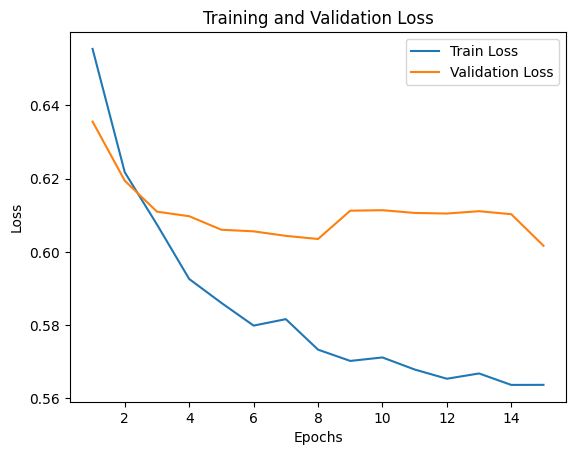

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), train_loss_values, label='Train Loss')
plt.plot(range(1, num_epochs + 1), valid_loss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [23]:
import itertools  # Import this at the top of your script

# Initialize required variables
y_pred = []
y_test = []
correct = 0
total = 0

"""
We're not training so we don't need to calculate the gradients for our outputs
"""
with torch.no_grad():
    for X, y in test_dataloader:
        outputs = serious_model(X)  # Get model outputs
        predicted = np.where(outputs.numpy() < 0.45, 0, 1)  # Convert to NumPy and apply threshold
        predicted = list(itertools.chain(*predicted))  # Flatten predictions
        y_pred.append(predicted)  # Append predictions
        y_test.append(y.numpy())  # Append true labels as NumPy
        total += y.size(0)  # Increment total count
        correct += (predicted == y.numpy()).sum().item()  # Count correct predictions

print(f'Accuracy of the network on the test instances: {100 * correct // total}%')

Accuracy of the network on the test instances: 70%


In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns

y_pred = list(itertools.chain(*y_pred))
y_test = list(itertools.chain(*y_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73     16784
         1.0       0.74      0.65      0.69     16818

    accuracy                           0.71     33602
   macro avg       0.71      0.71      0.71     33602
weighted avg       0.71      0.71      0.71     33602



In [25]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[13004,  3780],
       [ 5967, 10851]])

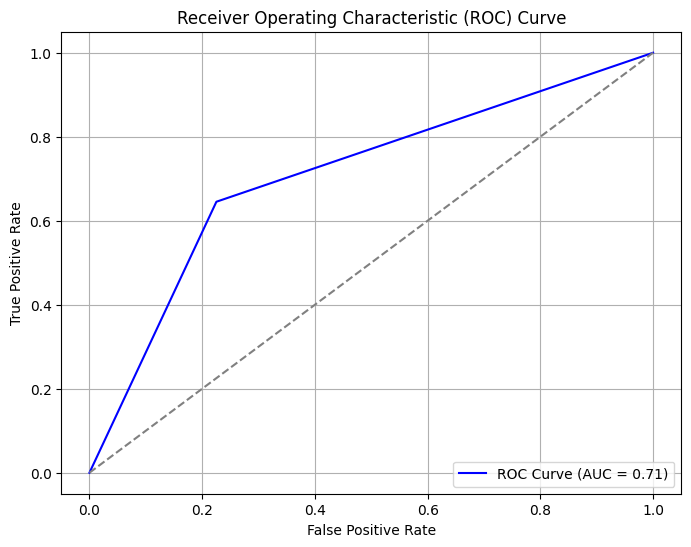

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line (random performance)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [27]:
torch.save(serious_model, "Models/serious_model.pth")

Split Reaction Data

In [28]:
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import resample
import numpy as np

def ml_smote(X, Y, k=5, target_samples=4500):
    """
    Adjusts the number of samples per label to a target number using MLSMOTE.
    
    Parameters:
        X (array): Feature matrix (NumPy array or DataFrame).
        Y (array): Multi-label matrix (NumPy array or DataFrame).
        k (int): Number of nearest neighbors.
        target_samples (int): Target number of samples per label.
    
    Returns:
        X_balanced, Y_balanced: Balanced feature and label matrices.
    """
    # Get label frequencies
    label_frequencies = Y.sum(axis=0)
    print(f"Label frequencies: {label_frequencies}")

    # Get label frequencies
    label_frequencies = Y.sum(axis=0)
    print(f"Label frequencies: {label_frequencies}")

    # Calculate the total number of samples to generate
    total_samples_to_generate = sum(max(0, target_samples - frequency) for frequency in label_frequencies)
    print(f"Total samples to generate: {total_samples_to_generate}")
    
    X_balanced, Y_balanced = [], []
    
    for label_idx in range(Y.shape[1]):
        # Get indices of samples for the current label
        label_indices = np.where(Y[:, label_idx] == 1)[0]
        X_label = X[label_indices]
        Y_label = Y[label_indices]
        print("X Label ", X_label)
        row_index = 0 
        print(f"Length of row {row_index} in X_label:", len(X_label[row_index]))
        print("Y Label ", Y_label)
        print(f"Length of row {row_index} in X_label:", len(Y_label[row_index]))
        
        # Downsample if overrepresented
        if len(X_label) > target_samples:
            #X_downsampled = resample(X_label, replace=False, n_samples=target_samples, random_state=28)
            #Y_downsampled = np.tile(Y_label[0], (target_samples, 1))
            indices = resample(np.arange(len(X_label)), replace=False, n_samples=target_samples, random_state=42)
            X_downsampled = X_label[indices]
            Y_downsampled = Y_label[indices]
            X_balanced.append(X_downsampled)
            Y_balanced.append(Y_downsampled)
        
        # Upsample if underrepresented
        elif len(X_label) < target_samples:
            # Fit nearest neighbors
            knn = NearestNeighbors(n_neighbors=k).fit(X_label)
            synthetic_X, synthetic_Y = [], []
            num_to_generate = target_samples - len(X_label)
            print("number to generate", num_to_generate)
            
            for _ in range(num_to_generate):
                print(_)
                # Randomly select a minority sample
                idx = np.random.choice(len(X_label))
                x = X_label[idx]
                labels = Y_label[idx]
                
                # Find k-nearest neighbors
                neighbors = knn.kneighbors([x], return_distance=False)[0]
                neighbors = neighbors[1:]  # Exclude itself
                
                # Generate synthetic sample
                weights = np.random.dirichlet(np.ones(len(neighbors)))
                neighbor_x = np.dot(weights, X_label[neighbors])
                synthetic_x = x + np.random.rand() * (neighbor_x - x)
                synthetic_y = np.logical_or(labels, Y_label[neighbors[0]]).astype(int)
                
                synthetic_X.append(synthetic_x)
                synthetic_Y.append(synthetic_y)
            
            X_upsampled = np.vstack([X_label, synthetic_X])
            Y_upsampled = np.vstack([Y_label, synthetic_Y])
            X_balanced.append(X_upsampled)
            Y_balanced.append(Y_upsampled)
        
        else:
            # If already balanced, retain the data as is
            X_balanced.append(X_label)
            Y_balanced.append(Y_label)
    
    # Combine all balanced samples
    X_balanced = np.vstack(X_balanced)
    Y_balanced = np.vstack(Y_balanced)
    
    return X_balanced, Y_balanced

# Example usage
X_resampled_reaction, Y_resampled_reaction = ml_smote(X_reaction.values, Y_reaction.values, k=3, target_samples=500)

print("Original data shape:", X_reaction.shape, Y_reaction.shape)
print("Resampled data shape:", X_resampled_reaction.shape, Y_resampled_reaction.shape)

Label frequencies: [  307   407   419   426    73   106   410   197   695   622   144    72
    89   131    77   117   114   284   449    55   148    64    68   139
   114   531   145   143   133   186   113   114    60   549   703   245
   175    89  1505   317   424   148   488   121   317    75    79    53
   823   363   205   300   173  1508  5579  1341 19081    96    65   106
   111   183   462    60    52    72   100    73    55   211    66   219
   207   183    55   265   833   500   656   179   108   135   168   121
    68   105  1700   264   205   118   159  1998   221   518   207   149
    65   247   371    58    59   125   196   120   453    98   120  1124
   996    66   437    82   314    51   173   213   195   790   329    61
    52   147   190    52   976   727    69    61   591    77   502   245
   222   106   265   229   135   158   146   286  1537   159   456   191
   945   252   674  1816   172   129   138   420    83    55   235   313
   191  1086    86   161   179  

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
import numpy as np

# Address class imbalance using SMOTE
#smote = SMOTE()
#X_resampled, y_resampled = smote.fit_resample(X, Y)

#X_resampled = X.copy()
#y_resampled = Y.copy()

print(X_resampled_reaction.shape)
print(Y_resampled_reaction.shape)

# Standardize the data
reaction_scaler = StandardScaler()
X_resampled_reaction = reaction_scaler.fit_transform(X_resampled_reaction)

print(X_resampled_reaction.shape)
print(Y_resampled_reaction.shape)

from sklearn.model_selection import train_test_split

X_train_reaction, X_test_reaction, y_train_reaction, y_test_reaction = train_test_split(X_resampled_reaction, Y_resampled_reaction, test_size=0.4, random_state=26)

X_train_reaction, X_val_reaction, y_train_reaction, y_val_reaction = train_test_split(X_train_reaction, y_train_reaction, test_size=0.2, random_state=26)

(285000, 2051)
(285000, 570)
(285000, 2051)
(285000, 570)


In [30]:
import numpy as np

# Count occurrences of 1s for each label (column-wise sum)
label_counts = np.sum(Y_reaction, axis=0)
print("Label Counts for Each Label:", label_counts)

# Compute weights inversely proportional to label frequencies
weights = 1.0 / label_counts  # Higher weights for minority labels
print("Sampling Weights for Each Label:", weights)

Label Counts for Each Label: Reaction_Abdominal Discomfort                         307
Reaction_Abdominal Distension                         407
Reaction_Abdominal Pain                               419
Reaction_Abdominal Pain Upper                         426
Reaction_Abnormal Behaviour                            73
                                                     ... 
Reaction_Wrist Fracture                                77
Reaction_Wrong Patient Received Product                55
Reaction_Wrong Product Administered                   560
Reaction_Wrong Technique In Device Usage Process      656
Reaction_Wrong Technique In Product Usage Process    1117
Length: 570, dtype: int64
Sampling Weights for Each Label: Reaction_Abdominal Discomfort                        0.003257
Reaction_Abdominal Distension                        0.002457
Reaction_Abdominal Pain                              0.002387
Reaction_Abdominal Pain Upper                        0.002347
Reaction_Abnormal Behaviou

In [31]:
column_sums = Y_resampled_reaction.sum(axis=0)
print("Sum of each column:", column_sums)

Sum of each column: [ 3889 13467 13894  6267  1624  1500  1441  1591  1566  5349  1245  1866
  1129  1937  1790  1979  1169  3299 13871  1385  1781   995  1706  1816
   844 15171  2010  9864  9757  2873  2046  7636  6364  8327  7715  2877
 10432  4829 17757 13881  5062  2319  7227  8595  5922  1289  1073  1133
  5959  4074  4308 12044  6036 10204 36899 11810 86620  8827  1604  2197
  1836  3174  5932  1645  1314  2145  8510  1974  1410  2526  1377  1916
  2481  3013  1564  3288  8351  4486  6443  1928  1968  1422 10084  2638
  1727  1976 14420  2074  2430  1447  1358 13347  3588  6093  3401  2599
  1016  3193 11693  1490   807  2564  2335  1396  4507   745  1870 28532
  9555  1916 13847  1791  4558   969  2083  3038  3444  9979  2528   901
  1173  1949  1962   973 12718  9363  1431  1275  6712  1376  2992  2040
  3106  1388  4745  1603  1069   918   888  2075  5236  1153  2598   993
  3005  1164 15160 14740  1777  1299  1782  2606   921  1268  3920  3599
  1667 11643  1187  1698  3230 

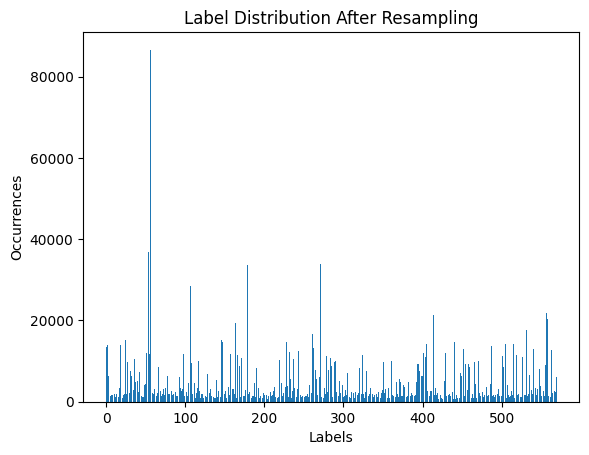

In [32]:
import matplotlib.pyplot as plt
plt.bar(range(len(column_sums)), column_sums)
plt.xlabel("Labels")
plt.ylabel("Occurrences")
plt.title("Label Distribution After Resampling")
plt.show()

In [33]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))  # to_numpy() #Ensure y is a torch tensor
        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.len


# Compute sample weights for the training data
def compute_sample_weights(y, label_weights):
    # Convert label weights (Pandas Series) to NumPy array
    label_weights_array = label_weights.values
    # Calculate sample weights as the sum of label weights for each row
    sample_weights = np.dot(y, label_weights_array) # .to_numpy()
    return torch.tensor(sample_weights, dtype=torch.float)


# Set batch size
batch_size = 512 # 256 # 128 # 64

# Instantiate training, validation, and test datasets
train_data = Data(X_train_reaction, y_train_reaction)
valid_data = Data(X_val_reaction, y_val_reaction)
test_data = Data(X_test_reaction, y_test_reaction)

# Compute sample weights for the training data
sample_weights = compute_sample_weights(y_train_reaction, weights)

# Create a WeightedRandomSampler for the training data
sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),  # Ensure all samples are considered
    replacement=True  # Allows oversampling of minority samples
)

# Create DataLoaders for training, validation, and test data
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, sampler=sampler)  # Use sampler for training
valid_dataloader = DataLoader(dataset=valid_data, batch_size=batch_size, shuffle=False)   # No sampler for validation
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)     # No sampler for testing

# Check that it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch + 1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

total_label_sums = torch.zeros(y_train_reaction.shape[1])  # Adjust shape based on your dataset
for batch_X, batch_Y in train_dataloader:
    total_label_sums += batch_Y.sum(axis=0)
print("Total label distribution across batches:", total_label_sums)

Batch: 1
X shape: torch.Size([512, 2051])
y shape: torch.Size([512, 570])
Total label distribution across batches: tensor([ 2304., 26632., 27579.,  7370.,  1082.,   899.,   211.,   691.,   379.,
         2678.,   585.,  1441.,   537.,  1215.,  1379.,  1704.,   378.,  1763.,
        26143.,  1203.,  1043.,   578.,  1551.,  1103.,   248., 28373.,  1084.,
        23987., 23952.,  1787.,  1169., 20211., 18814.,  6012.,  4119.,  1631.,
        24680., 11982., 13981., 31084.,  3094.,  1366.,  4727., 22951.,  4776.,
          889.,   574.,   790.,  2984.,  2150.,  3032., 25627., 12120.,  4797.,
        16836.,  6714., 34906., 23188.,  1262.,  1605.,  1223.,  1816.,  3254.,
         1177.,  1183.,  1897., 22716.,  1718.,  1062.,  1259.,  1024.,   884.,
         1608.,  2191.,  1168.,  2204.,  4551.,  2830.,  4115.,   928.,  1247.,
          580., 23890.,  3168.,  1463.,  1640.,  8489.,   882.,  1573.,   723.,
          640.,  6391.,  2516.,  3546.,  2312.,  1774.,   592.,  2412., 24701.,
     

In [34]:

import torch
from torch import nn
from torch import optim

input_dim = len(feat_cols) #393
hidden_dim = 4096 #400
output_dim = len(predict_cols)

class MultiOutputNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultiOutputNeuralNetwork, self).__init__()
        
        # Define multiple layers
        self.layer_1 = nn.Linear(input_dim, hidden_dim // 2 + output_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        
        self.layer_2 = nn.Linear(hidden_dim // 2 + output_dim, hidden_dim // 4 + output_dim)  # Hidden layer (reduce size)
        nn.init.kaiming_uniform_(self.layer_2.weight, nonlinearity="relu")
        
        self.layer_3 = nn.Linear(hidden_dim // 4 + output_dim, hidden_dim // 8 + output_dim)  # Another hidden layer
        nn.init.kaiming_uniform_(self.layer_3.weight, nonlinearity="relu")

        self.layer_4 = nn.Linear(hidden_dim // 8 + output_dim, hidden_dim // 16 + output_dim)  # Fourth hidden layer
        nn.init.kaiming_uniform_(self.layer_4.weight, nonlinearity="relu")
        
        self.layer_5 = nn.Linear(hidden_dim // 16 + output_dim, hidden_dim // 32 + output_dim)  # Fifth hidden layer
        nn.init.kaiming_uniform_(self.layer_5.weight, nonlinearity="relu")

        self.layer_6 = nn.Linear(hidden_dim // 32 + output_dim, hidden_dim // 64 + output_dim)  # Fourth hidden layer
        nn.init.kaiming_uniform_(self.layer_4.weight, nonlinearity="relu")
        
        self.layer_7 = nn.Linear(hidden_dim // 64 + output_dim, hidden_dim // 128 + output_dim)  # Fifth hidden layer
        nn.init.kaiming_uniform_(self.layer_5.weight, nonlinearity="relu")
        
        self.output_layer = nn.Linear(hidden_dim // 128 + output_dim, output_dim)  # Final output layer

        self.dropout = nn.Dropout(p=0.2)  # Define dropout
        
    def forward(self, x):
        # Pass through layers with ReLU activations
        x = torch.nn.functional.relu(self.layer_1(x))
        x = self.dropout(x)
        x = torch.nn.functional.relu(self.layer_2(x))
        x = self.dropout(x)
        x = torch.nn.functional.relu(self.layer_3(x))
        x = self.dropout(x)
        x = torch.nn.functional.relu(self.layer_4(x))
        x = self.dropout(x)
        x = torch.nn.functional.relu(self.layer_5(x))
        x = self.dropout(x)
        x = torch.nn.functional.relu(self.layer_6(x))
        x = self.dropout(x)
        x = torch.nn.functional.relu(self.layer_7(x))
        x = self.dropout(x)

        #x = torch.nn.functional.sigmoid(self.output_layer(x))  # Sigmoid for binary output
        #x = torch.sigmoid(self.output_layer(x))
        x = self.output_layer(x)
        return x
       
reaction_model = MultiOutputNeuralNetwork(input_dim, hidden_dim, output_dim)
print(reaction_model)

MultiOutputNeuralNetwork(
  (layer_1): Linear(in_features=2051, out_features=2618, bias=True)
  (layer_2): Linear(in_features=2618, out_features=1594, bias=True)
  (layer_3): Linear(in_features=1594, out_features=1082, bias=True)
  (layer_4): Linear(in_features=1082, out_features=826, bias=True)
  (layer_5): Linear(in_features=826, out_features=698, bias=True)
  (layer_6): Linear(in_features=698, out_features=634, bias=True)
  (layer_7): Linear(in_features=634, out_features=602, bias=True)
  (output_layer): Linear(in_features=602, out_features=570, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [35]:

import torch
from torch import nn
from torch.nn import BCEWithLogitsLoss


learning_rate = 0.001

label_counts = np.sum(y_train_reaction, axis=0)
total_samples = y_train_reaction.shape[0]

class_weights = total_samples / (len(label_counts) * label_counts)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

loss_fn = BCEWithLogitsLoss(pos_weight=class_weights)
#loss_fn = nn.BCELoss()

optimizer = torch.optim.Adam(reaction_model.parameters(), lr=learning_rate)

#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [36]:

import torch
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, hamming_loss

num_epochs = 50
train_loss_values = []
valid_loss_values = []

train_accuracy_values = []
valid_accuracy_values = []
train_f1_values = []
valid_f1_values = []

for epoch in range(num_epochs):
    # Training phase
    reaction_model.train()
    train_loss = 0.0

    y_true_train = []
    y_pred_train = []

    for X, y in train_dataloader:
        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        pred = reaction_model(X)
        loss = loss_fn(pred, y) 
        train_loss += loss.item()

        # Convert model outputs to binary predictions
        pred_labels = (torch.sigmoid(pred) >= 0.5).int()

        # Store true and predicted values for metric evaluation
        y_true_train.append(y.cpu().numpy())
        y_pred_train.append(pred_labels.cpu().numpy())

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Compute average training loss
    train_loss /= len(train_dataloader)
    train_loss_values.append(train_loss)

    # Convert collected predictions and true values to NumPy arrays
    y_true_train = np.concatenate(y_true_train, axis=0)
    y_pred_train = np.concatenate(y_pred_train, axis=0)

    # Compute multi-label classification metrics
    train_accuracy = accuracy_score(y_true_train, y_pred_train)  # Subset accuracy
    train_hamming_loss = hamming_loss(y_true_train, y_pred_train)  # Measures incorrect labels
    train_classification_report = classification_report(y_true_train, y_pred_train, zero_division=0, output_dict=True)
    train_f1_score = train_classification_report["macro avg"]["f1-score"]

    train_accuracy_values.append(train_accuracy)
    train_f1_values.append(train_f1_score)

    # Validation phase
    reaction_model.eval()
    val_loss = 0.0

    y_true_val = []
    y_pred_val = []

    with torch.no_grad():
        for X_val, y_val in valid_dataloader:
            pred = reaction_model(X_val)
            loss = loss_fn(pred, y_val)
            val_loss += loss.item()

            pred_labels = (torch.sigmoid(pred) >= 0.5).int()
            y_true_val.append(y_val.cpu().numpy())
            y_pred_val.append(pred_labels.cpu().numpy())

    # Compute average validation loss
    val_loss /= len(valid_dataloader)
    valid_loss_values.append(val_loss)

    # Convert validation predictions and true values to NumPy arrays
    y_true_val = np.concatenate(y_true_val, axis=0)
    y_pred_val = np.concatenate(y_pred_val, axis=0)

    # Compute multi-label classification metrics
    val_accuracy = accuracy_score(y_true_val, y_pred_val)
    val_hamming_loss = hamming_loss(y_true_val, y_pred_val)
    val_classification_report = classification_report(y_true_val, y_pred_val, zero_division=0, output_dict=True)
    val_f1_score = val_classification_report["macro avg"]["f1-score"]

    valid_accuracy_values.append(val_accuracy)
    valid_f1_values.append(val_f1_score)

    # Print epoch results
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    print(f"Train Accuracy (Subset): {train_accuracy:.4f}, Validation Accuracy (Subset): {val_accuracy:.4f}")
    print(f"Train F1-score: {train_f1_score:.4f}, Validation F1-score: {val_f1_score:.4f}")
    print(f"Train Hamming Loss: {train_hamming_loss:.4f}, Validation Hamming Loss: {val_hamming_loss:.4f}")

print("Training Complete")

Epoch 1/50
Train Loss: 0.0273, Validation Loss: 0.0144
Train Accuracy (Subset): 0.0024, Validation Accuracy (Subset): 0.0037
Train F1-score: 0.0552, Validation F1-score: 0.0989
Train Hamming Loss: 0.0348, Validation Hamming Loss: 0.0131
Epoch 2/50
Train Loss: 0.0141, Validation Loss: 0.0136
Train Accuracy (Subset): 0.0296, Validation Accuracy (Subset): 0.0095
Train F1-score: 0.1245, Validation F1-score: 0.1189
Train Hamming Loss: 0.0196, Validation Hamming Loss: 0.0129
Epoch 3/50
Train Loss: 0.0132, Validation Loss: 0.0171
Train Accuracy (Subset): 0.0718, Validation Accuracy (Subset): 0.0251
Train F1-score: 0.1625, Validation F1-score: 0.1470
Train Hamming Loss: 0.0177, Validation Hamming Loss: 0.0125
Epoch 4/50
Train Loss: 0.0125, Validation Loss: 0.0155
Train Accuracy (Subset): 0.1102, Validation Accuracy (Subset): 0.0303
Train F1-score: 0.1891, Validation F1-score: 0.1740
Train Hamming Loss: 0.0168, Validation Hamming Loss: 0.0121
Epoch 5/50
Train Loss: 0.0120, Validation Loss: 0.01

Analyze Reaction Model

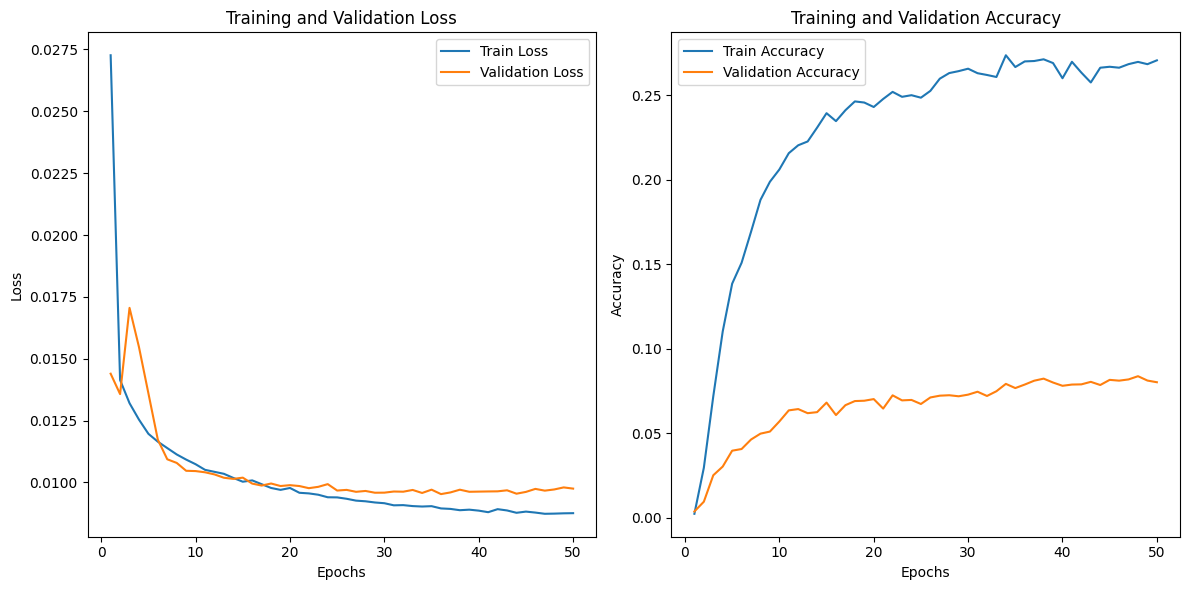

In [37]:
# Plotting Loss and Accuracy
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_values, label='Train Loss')
plt.plot(epochs, valid_loss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_values, label='Train Accuracy')
plt.plot(epochs, valid_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
label_counts = y_train_reaction.sum(axis=0)
print("Label counts in training data:", label_counts)

Label counts in training data: [ 1878  6512  6704  3062   761   708   699   779   770  2579   605   888
   561   917   871   935   561  1558  6658   725   840   472   806   869
   396  7344   980  4772  4722  1412   929  3727  3080  4001  3633  1356
  5058  2337  8459  6759  2440  1089  3429  4156  2800   650   548   543
  2824  1971  2092  5858  2878  4903 17578  5658 41348  4253   757  1024
   874  1493  2840   789   633  1029  4079   936   677  1247   684   951
  1249  1454   714  1543  3967  2087  3061   881   931   695  4842  1264
   809   926  7030   983  1178   694   642  6307  1770  2875  1603  1265
   480  1549  5630   702   387  1249  1082   664  2175   358   888 13763
  4638   934  6633   874  2166   461  1012  1451  1666  4743  1234   421
   546   923   978   494  6184  4457   681   623  3141   680  1435   998
  1479   631  2282   767   528   425   437  1020  2528   542  1240   475
  1480   548  7268  6994   839   623   853  1274   470   614  1920  1711
   777  5543   533  

In [39]:
from sklearn.metrics import precision_recall_curve, classification_report, hamming_loss
from scipy.special import expit  # Sigmoid function
import numpy as np

# Step 1: Dynamically calculate thresholds for all labels
def calculate_thresholds(y_true, y_probs):
    """
    Calculate optimal thresholds for each label based on precision-recall curves.
    
    Parameters:
        y_true (array): True binary labels (shape: [n_samples, n_labels]).
        y_probs (array): Predicted probabilities (shape: [n_samples, n_labels]).
    
    Returns:
        thresholds_array (array): Optimal thresholds for each label.
    """
    thresholds = []
    for i in range(y_true.shape[1]):  # Iterate over all labels dynamically
        precision, recall, thresholds_curve = precision_recall_curve(y_true[:, i], y_probs[:, i])
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)  # Avoid division by zero
        optimal_threshold = thresholds_curve[f1_scores.argmax()]  # Find the best threshold
        thresholds.append(optimal_threshold)
    return np.array(thresholds)

# Step 2: Generate predictions using custom thresholds
def apply_thresholds(y_probs, thresholds_array):
    """
    Apply custom thresholds to convert probabilities into binary predictions.
    
    Parameters:
        y_probs (array): Predicted probabilities (shape: [n_samples, n_labels]).
        thresholds_array (array): Thresholds for each label.
    
    Returns:
        y_pred (array): Binary predictions (shape: [n_samples, n_labels]).
    """
    return (y_probs >= thresholds_array).astype(int)

# Use these functions dynamically
with torch.no_grad():
    y_probs = []  # Collect probabilities
    y_true = []  # Collect true labels

    for X, y in test_dataloader:
        outputs = reaction_model(X)  # Get raw logits
        #y_probs.append(outputs.numpy())  # Store probabilities
        y_probs.append(expit(outputs.numpy()))  # Convert logits to probabilities
        y_true.append(y.numpy())  # Store true labels

    # Combine batches into full arrays
    y_probs = np.concatenate(y_probs, axis=0)
    y_true = np.concatenate(y_true, axis=0)

    # Dynamically calculate thresholds
    thresholds_array = calculate_thresholds(y_true, y_probs)
    print(thresholds_array)

    # Apply thresholds to generate binary predictions
    y_pred = apply_thresholds(y_probs, thresholds_array)

    # Evaluate the model
    print(classification_report(y_true, y_pred, target_names=[f"Label {i}" for i in range(y_true.shape[1])]))
    print(f"Hamming Loss: {hamming_loss(y_true, y_pred):.4f}")

[0.02501484 0.07080854 0.04238316 0.09149788 0.1290936  0.02993402
 0.02131679 0.1494577  0.00754856 0.03373167 0.08325581 0.4652344
 0.11506363 0.24256094 0.15726842 0.03483323 0.09020384 0.02758532
 0.02252515 0.23389931 0.03783733 0.25385123 0.08702537 0.06702925
 0.06752811 0.01620425 0.05169918 0.1604415  0.16567305 0.11412521
 0.05091817 0.0671855  0.05923992 0.01453773 0.0261473  0.02213126
 0.08935069 0.09943304 0.01257757 0.0391472  0.06974965 0.04293135
 0.03089809 0.15486677 0.0688979  0.15483996 0.05173394 0.18707892
 0.01211219 0.01722717 0.20405953 0.03525694 0.06870915 0.0156375
 0.004132   0.01322231 0.00284137 0.04431986 0.16798726 0.08910599
 0.06888893 0.05164129 0.03243213 0.12051199 0.19893017 0.10721237
 0.05327834 0.11351199 0.09328156 0.14077388 0.32274884 0.04998579
 0.06062748 0.06542966 0.10736295 0.05532367 0.0103118  0.03176078
 0.01628869 0.02079061 0.03275467 0.08364832 0.09999336 0.25828406
 0.10253912 0.11291304 0.00636127 0.02997357 0.06347824 0.137639

c:\Users\Dara\Documents\Python programs\Logistic Regression\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     Label 0       0.41      0.15      0.22      1528
     Label 1       0.98      0.77      0.86      5305
     Label 2       0.97      0.74      0.84      5520
     Label 3       0.83      0.32      0.46      2445
     Label 4       0.65      0.33      0.43       640
     Label 5       0.09      0.20      0.12       606
     Label 6       0.36      0.26      0.30       556
     Label 7       0.81      0.34      0.48       627
     Label 8       0.08      0.08      0.08       604
     Label 9       0.79      0.51      0.62      2120
    Label 10       0.53      0.28      0.37       509
    Label 11       0.85      0.54      0.66       736
    Label 12       0.47      0.20      0.28       417
    Label 13       0.66      0.28      0.39       792
    Label 14       0.63      0.58      0.61       729
    Label 15       0.59      0.21      0.32       788
    Label 16       0.62      0.24      0.35       462
    Label 17       0.14    

In [40]:
import itertools  # Import this at the top of your script

# Initialize required variables
y_pred = []
y_test = []
correct = 0
total = 0

"""
We're not training so we don't need to calculate the gradients for our outputs
"""
with torch.no_grad():
    for X, y in test_dataloader:
        outputs = reaction_model(X)  # Get model outputs
        probabilities = torch.sigmoid(outputs)  # Convert logits to probabilities
        #predicted = np.where(outputs.numpy() < thresholds_array, 0, 1)  # Convert to NumPy and apply threshold
        predicted = np.where(probabilities.numpy() < thresholds_array, 0, 1)
        #predicted = list(itertools.chain(*predicted))  # Flatten predictions
        y_pred.append(predicted)  # Append predictions
        y_test.append(y.numpy())  # Append true labels as NumPy
        total += y.size(0)  # Increment total count
        correct += (predicted == y.numpy()).sum().item()  # Count correct predictions

#print(f'Accuracy of the network on the test instances: {100 * correct // total}%')
#y_pred = np.concatenate(y_pred, axis=0)  # Combine batches into a single array
#y_test = np.concatenate(y_test, axis=0)  # Combine batches into a single array
#total = y_test.size  # Total number of labels
#correct = (y_pred == y_test).sum()  # Total number of correct predictions
#accuracy = 100 * correct / total
#print(f'Accuracy of the network on the test instances: {accuracy:.2f}%')

from sklearn.metrics import accuracy_score, classification_report

# Convert tensors to NumPy arrays
y_pred = np.concatenate(y_pred, axis=0)
y_test = np.concatenate(y_test, axis=0)

# Calculate subset accuracy (Exact match across all labels)
subset_accuracy = accuracy_score(y_test, y_pred)
print(f'Subset Accuracy (Exact Match): {subset_accuracy:.2f}')

Subset Accuracy (Exact Match): 0.10


In [181]:

import numpy as np
import random
import torch

# Exclude specific columns
columns_to_exclude = ['Case ID', 'Suspect Product Active Ingredients', 'Sex', 'Patient Age', 'Patient Weight', 'Serious']

# Create drug-related columns
drug_cols = [col for col in df_encoded.columns if col.startswith("Product_")]

# Generate random drug data
random_drugs = random.sample(drug_cols, 3)#["Insulin Pork\Insulin Purified Pork", "Insulin Beef"] #random.sample(drug_cols, 3)
print("Patient Drugs: ", random_drugs)
drug_array = np.zeros(len(drug_cols))
column_indices = [df_encoded.columns.get_loc(col) for col in random_drugs]
for idx in column_indices:
    drug_array[idx - 5] = 1

# Create a specific patient profile
specific_profile = np.array([[1, 83, 65]])  # Adjust profile values as needed
specific_profile = np.concatenate([specific_profile, drug_array.reshape(1, -1)], axis=1)

# Standardize the profile using the same scaler used during training
specific_profile_scaled = scaler.transform(specific_profile)  # 'scaler' is the StandardScaler from training

# Convert the profile to a PyTorch tensor
specific_profile_tensor = torch.tensor(specific_profile_scaled, dtype=torch.float32)

# Predict the outcome using your PyTorch model
serious_model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    prediction = serious_model(specific_profile_tensor)
    predicted_outcome = (prediction >= 0.5).float().item()  # Threshold of 0.5
    predicted_probability = prediction.item()

print(f"Serious Model Prediction: Outcome = {predicted_outcome}, Probability = {predicted_probability:.4f}")

reaction_profile = torch.cat([torch.tensor([[predicted_outcome]], dtype=torch.float32), torch.tensor(specific_profile, dtype=torch.float32)], dim=1)

reaction_profile_scaled = reaction_scaler.transform(reaction_profile)

specific_profile_reaction =  torch.tensor(reaction_profile_scaled, dtype=torch.float32)


reaction_model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    serious_prediction = reaction_model(specific_profile_reaction)  # Raw logits
    #predicted_outcomes = (torch.sigmoid(prediction) >= 0.5).float()  # Apply sigmoid and threshold
    serious_predicted_probabilities = torch.sigmoid(serious_prediction).numpy()  # Convert logits to probabilities
    #predicted_probabilities = prediction.numpy()  # Convert logits to probabilities
    serious_predicted_outcomes = (serious_predicted_probabilities >= thresholds_array).astype(float)  # Apply sigmoid and threshold


# Initialize an empty list to store column names with "Yes" outcomes and their probabilities
yes_labels_with_probabilities = []

# Iterate over the predicted outcomes and corresponding probabilities
#for outcome, probability, column_name in zip(
#    serious_predicted_outcomes.flatten(), 
    #prediction.numpy().flatten(), 
#    torch.sigmoid(serious_prediction).numpy().flatten(),
#    Y_reaction.columns  
#):
#    if outcome == 1:  # Check if the outcome is "Yes"
        # Append column name and probability to the list
#        yes_labels_with_probabilities.append((column_name, probability))

# Print the list of column names with "Yes" outcomes and their probabilities
#print("Columns with 'Yes' outcomes and their probabilities:")
#for column_name, probability in yes_labels_with_probabilities:
#    print(f"{column_name}: Probability = {probability:.4f}")

for idx, (outcome, probability, column_name) in enumerate(
    zip(serious_predicted_outcomes.flatten(), 
        torch.sigmoid(serious_prediction).numpy().flatten(),
        Y_reaction.columns)
):
    if outcome == 1:  # Check if the outcome is "Yes"
        # Save the index along with the column name and probability
        yes_labels_with_probabilities.append((idx, column_name, probability))

print("Indices, columns, and probabilities for 'Yes' outcomes:")
for idx, column_name, probability in yes_labels_with_probabilities:
    print(f"Index: {idx}, Column: {column_name}, Probability: {probability:.4f}")

Patient Drugs:  ['Product_Losartan', 'Product_Investigational Product', 'Product_Glycine Max Whole']
Serious Model Prediction: Outcome = 1.0, Probability = 1.0000
Indices, columns, and probabilities for 'Yes' outcomes:
Index: 1, Column: Reaction_Abdominal Distension, Probability: 0.4239
Index: 2, Column: Reaction_Abdominal Pain, Probability: 0.3467
Index: 18, Column: Reaction_Anaemia, Probability: 0.1739
Index: 27, Column: Reaction_Appendicitis, Probability: 0.3167
Index: 28, Column: Reaction_Appendicolith, Probability: 0.2868
Index: 36, Column: Reaction_Ascites, Probability: 0.3572
Index: 37, Column: Reaction_Aspartate Aminotransferase Increased, Probability: 0.1073
Index: 38, Column: Reaction_Asthenia, Probability: 0.0183
Index: 43, Column: Reaction_Bacterial Infection, Probability: 0.2562
Index: 51, Column: Reaction_Blood Cholesterol Increased, Probability: 0.4102
Index: 57, Column: Reaction_Blood Phosphorus Increased, Probability: 0.3064
Index: 66, Column: Reaction_Blood Uric Acid 

c:\Users\Dara\Documents\Python programs\Logistic Regression\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Background data shape: torch.Size([50000, 2051])
Specific profile tensor shape: torch.Size([1, 2051])
specific_profile_reaction.shape: torch.Size([1, 2051])
number of feature names: 2051
shap values size (2051, 570)


C:\Users\Dara\AppData\Local\Temp\ipykernel_100040\2360615537.py:41: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_output,


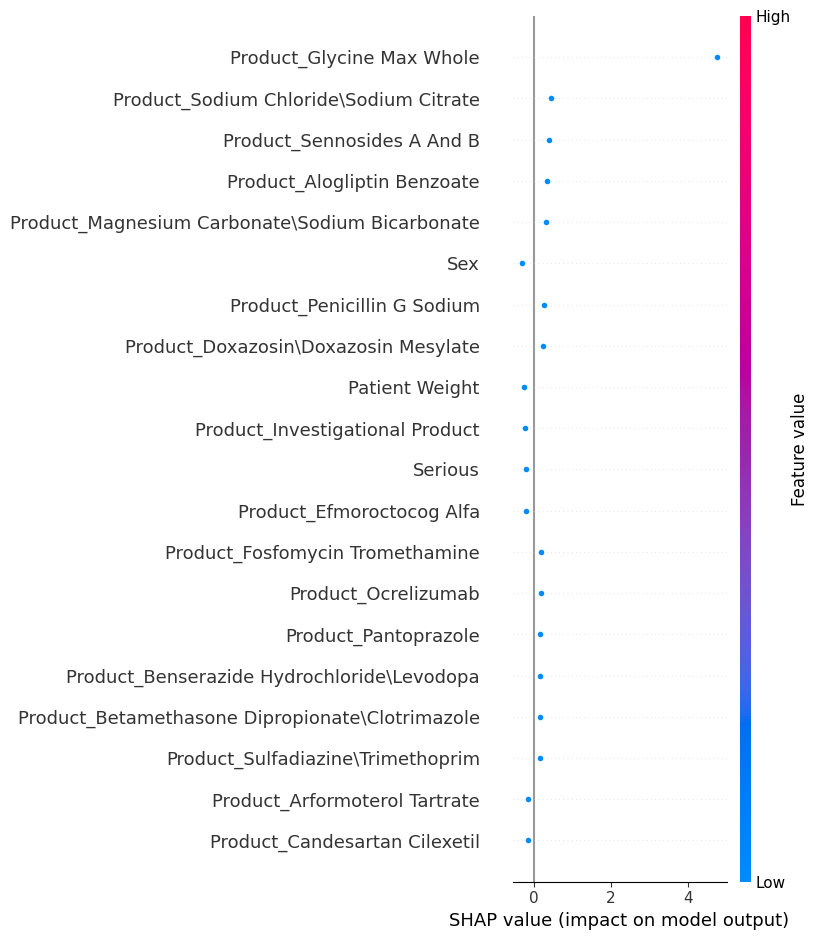

In [182]:
import shap
import torch

output_idx = 71

# Ensure your model is in evaluation mode
reaction_model.eval()

# Prepare background data for SHAP: sample a subset from your training set
background_sample = X_train_reaction[np.random.choice(X_train_reaction.shape[0], 50000, replace=False)]
#background_sample_scaled = scaler.transform(background_sample)

background_data = torch.tensor(background_sample, dtype=torch.float32)

print("Background data shape:", background_data.shape)
print("Specific profile tensor shape:", specific_profile_reaction.shape)

# Create a SHAP explainer for serious_model; adjust based on which model you want to interpret
#explainer = shap.DeepExplainer(reaction_model, background_data)

# Use your previously defined specific_profile_tensor; ensure it’s a tensor of the same type as training input
# Compute SHAP values for the specific patient profile
#shap_values = explainer.shap_values(specific_profile_reaction)

explainer = shap.GradientExplainer(reaction_model, background_data)
shap_values = explainer.shap_values(specific_profile_reaction)

shap_values_for_output = shap_values[0][:, output_idx].reshape(1, -1)

# Visualize SHAP values; the output might be a list per output if it’s a multi-label model
import matplotlib.pyplot as plt
# For example, to view the summary plot for one of the outputs:
#shap.summary_plot(shap_values[0].numpy(), specific_profile_tensor.numpy(), feature_names=df_encoded.columns[5:].tolist())

print("specific_profile_reaction.shape:", specific_profile_reaction.shape)
print("number of feature names:", len(X_reaction.columns))
print("shap values size", shap_values[0].shape)

#shap.summary_plot(shap_values[0], specific_profile_reaction.numpy(), feature_names=X_reaction.columns.to_list())

shap.summary_plot(shap_values_for_output,
                    specific_profile_reaction.numpy(),
                    feature_names=X_reaction.columns.to_list())

In [ ]:
torch.save(serious_model, "Models/serious_model.pth")

torch.save(reaction_model, "Models/reaction_model.pth")

In [ ]:
import joblib

# Save the trained scaler
joblib.dump(scaler, "Models/scaler.pkl")

joblib.dump(reaction_scaler, "Models/reaction_scaler.pkl")

['Models/scaler.pkl']